LAB: Visualización de datos usando Matplotlib
==========================================

In [1]:
## inicialización
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas
%matplotlib inline
df = pandas.read_csv('indicadores-mundiales.csv', sep=',', encoding='latin-1')

## Punto 1

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act2](images/suma-pob-region-edades-2.png)


<Figure size 1512x648 with 0 Axes>

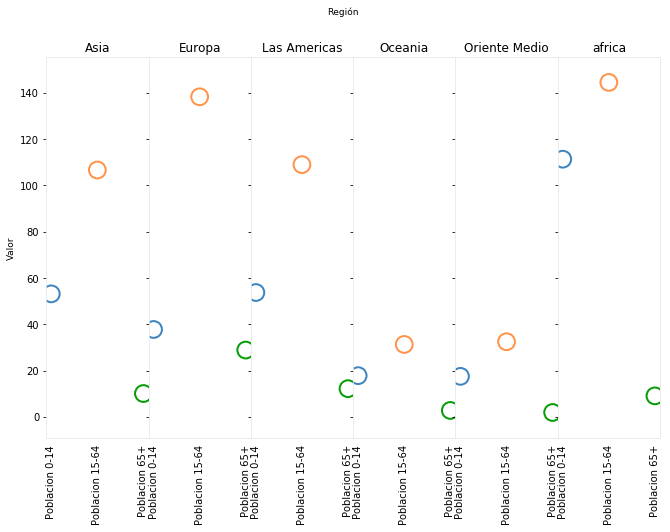

In [16]:
data = df.groupby('Region').sum()[['Poblacion 0-14', 'Poblacion 15-64', 'Poblacion 65+']]
data = data.sort_values(by='Region', ascending=True)
data['Poblacion 0-14'] = data['Poblacion 0-14'] / 100
data['Poblacion 15-64'] = data['Poblacion 15-64'] / 100
data['Poblacion 65+'] = data['Poblacion 65+'] / 100
data = data.transpose()
plt.figure(figsize=(21, 9))

fig, axs = plt.subplots(1, 6, sharex='col', sharey='row', figsize=(11, 7));
fig.suptitle("Región", fontsize=9)
plt.subplots_adjust(wspace = 0.00, hspace=0.1)
for index, colname in enumerate(data.columns):
    axs[index].scatter(list(data.index), data[colname], s=280, edgecolors=["#3e84bf", "#ff934a", "#059d05"], linewidths=2, 
                       facecolors='none')
    axs[index].set_xticklabels(list(data.index) ,rotation = 90, ha='center')
    axs[index].set_title(list(data.columns)[index])
    axs[index].spines['bottom'].set_color('#e7e7e7')
    axs[index].spines['top'].set_color('#e7e7e7') 
    axs[index].spines['right'].set_color('#e7e7e7')
    axs[index].spines['left'].set_color('#e7e7e7')
    axs[index].tick_params(axis='x', color='none', left=True)
    if (index == 0):
        axs[index].set_ylabel('Valor', fontsize=9)

## Punto 2

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act2](images/suma-pob-region-edades-3.png)


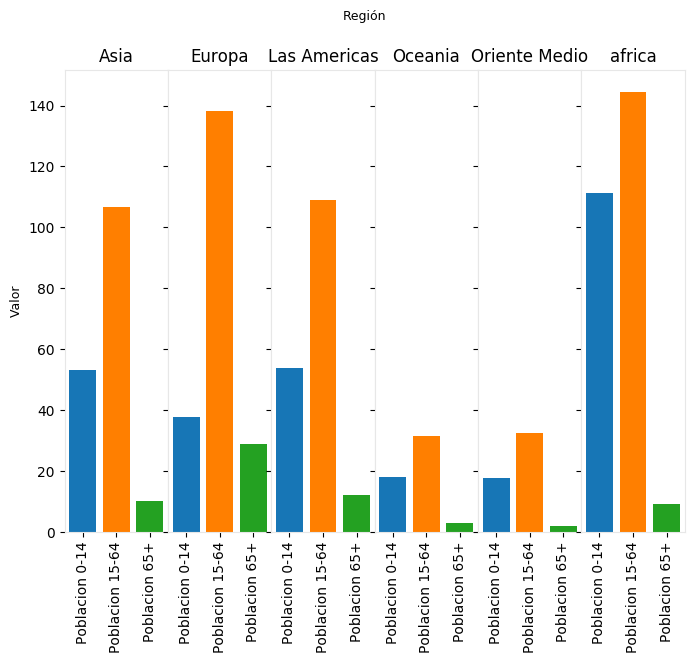

In [23]:
data = df.groupby('Region').sum()[['Poblacion 0-14', 'Poblacion 15-64', 'Poblacion 65+']]
data = data.sort_values('Region')
data['Poblacion 0-14'] = data['Poblacion 0-14'] / 100
data['Poblacion 15-64'] = data['Poblacion 15-64'] / 100
data['Poblacion 65+'] = data['Poblacion 65+'] / 100
data = data.transpose()
plt.style.use('default')
fig, axs = plt.subplots(1, 6, sharex='col', sharey='row', figsize=(8, 6));
fig.suptitle("Región", fontsize=9)
plt.subplots_adjust(wspace = 0.00, hspace=0.0)
for index, colname in enumerate(data.columns):
    axs[index].bar(list(data.index), data[colname], color = ["#1776b6", "#ff7f00", "#24a122"])
    axs[index].set_xticklabels(list(data.index) ,rotation = 90, ha='center')
    axs[index].set_title(list(data.columns)[index])
    axs[index].spines['bottom'].set_color('#e7e7e7')
    axs[index].spines['top'].set_color('#e7e7e7') 
    axs[index].spines['right'].set_color('#e7e7e7')
    axs[index].spines['left'].set_color('#e7e7e7')
    if (index == 0):
        axs[index].set_ylabel('Valor', fontsize=9)

## Punto 3
Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

![act3](images/suma-pob-region-edades-4.png)

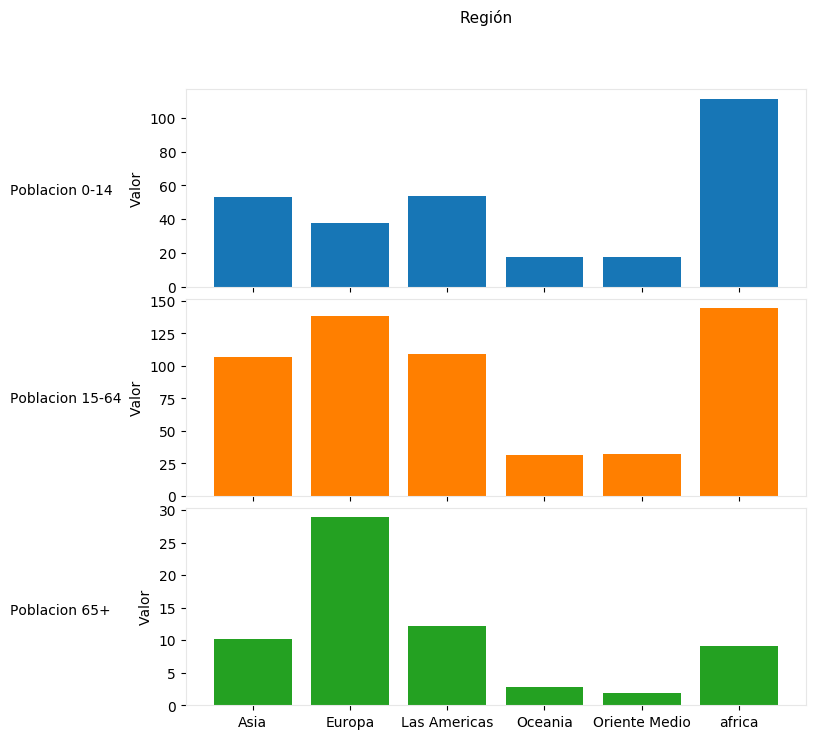

In [26]:
data = df.groupby('Region').sum()[['Poblacion 0-14', 'Poblacion 15-64', 'Poblacion 65+']]
data = data.sort_values('Region')
data['Poblacion 0-14'] = data['Poblacion 0-14'] / 100
data['Poblacion 15-64'] = data['Poblacion 15-64'] / 100
data['Poblacion 65+'] = data['Poblacion 65+'] / 100
fig, axs = plt.subplots(3, figsize=(8, 8), sharex=True);
plt.subplots_adjust(wspace = 0.00, hspace=0.06)
fig.suptitle("Región", fontsize=11)
colors = ["#1776b6", "#ff7f00", "#24a122"]
for index, colname in enumerate(data.columns):
    axs[index].bar(list(data.index), data[colname], color = colors[index])
    axs[index].text(-2.5, int(max(list(data[colname])) / 2), s=colname)
    axs[index].spines['bottom'].set_color('#e7e7e7')
    axs[index].spines['top'].set_color('#e7e7e7') 
    axs[index].spines['right'].set_color('#e7e7e7')
    axs[index].spines['left'].set_color('#e7e7e7')
    axs[index].set_ylabel('Valor')

## Punto 4

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Promedio de gastos per capita por año.

![act4](images/prom-gastos-salud-per-capita-ano.png)

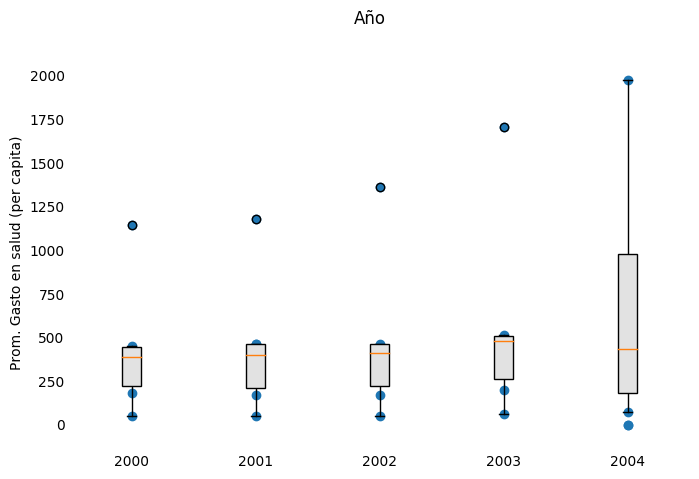

In [28]:
anios = []
datab = df.copy()
for i in datab['Ano']:
    anios.append(i.split("-")[0])
datab["Anio"] = anios
datab = datab.groupby(['Anio', 'Region']).mean()[['Gasto en salud (per capita)']]
data = df[['Region']].copy()
data = data.drop_duplicates()
data = data.sort_values(by=['Region'], ascending = True)
data = data.reset_index(drop=True)
iteracion = 0
for i in range(2000, 2004):
    lista = []
    for j in range(6 * (iteracion), 6 * (iteracion + 1)):
        data[str(i)] = 0
        lista.append(int(round(datab['Gasto en salud (per capita)'][j])))
    data[str(i)] = lista
    iteracion = iteracion + 1

for i in range(1):
    lista = []
    for j in range(6 * (iteracion), 6 * (iteracion) + 4):
        data['2004'] = 0
        lista.append(int(round(datab['Gasto en salud (per capita)'][j])))
    lista.append(0)
    lista.append(0)
    data['2004'] = lista
    iteracion = iteracion + 1

data.set_index('Region', inplace=True)

plt.style.use('default')
fig, axs = plt.subplots(1, 5, sharex='col', sharey='row', figsize=(8, 5));
fig.suptitle("Año")
plt.subplots_adjust(wspace = 0.00, hspace=0.0)
colors = ['cyan', 'lightblue', 'lightgreen', 'tan']
for index, colname in enumerate(data.columns):
    if (index != 4):
        axs[index].scatter([1, 1, 1, 1, 1, 1], data[colname])
        box = axs[index].boxplot(data[colname], patch_artist=True)
        colors = ['#e2e2e2', '#e2e2e2', '#e2e2e2', '#e2e2e2', '#e2e2e2']
        for patch, color in zip(box['boxes'], colors):
            patch.set_facecolor(color)
        axs[index].set_xlabel(colname)
        axs[index].set_xticklabels([])
    else:
        axs[index].scatter([1, 1, 1, 1, 1, 1], data[colname])
        box = axs[index].boxplot(data[colname][0:4], patch_artist=True)
        colors = ['#e2e2e2', '#e2e2e2', '#e2e2e2', '#e2e2e2', '#e2e2e2']
        for patch, color in zip(box['boxes'], colors):
            patch.set_facecolor(color)
        axs[index].set_xlabel(colname) 
        axs[index].set_xticklabels([])
    if (index == 0):
        axs[index].set_ylabel('Prom. Gasto en salud (per capita)')
    axs[index].tick_params(axis=u'both', which=u'both',length=0)
    axs[index].spines['bottom'].set_color('#ffffff')
    axs[index].spines['top'].set_color('#ffffff') 
    axs[index].spines['right'].set_color('#ffffff')
    axs[index].spines['left'].set_color('#ffffff')

## Punto 5

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Promedio de gastos per capita por año.

![act5](images/prom-region-edades-ano.png)

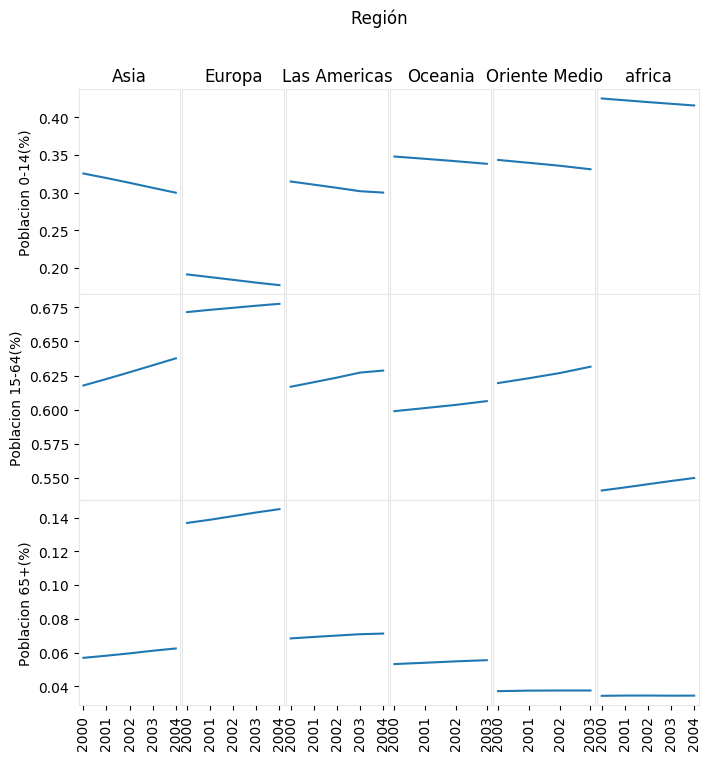

In [29]:
anios = []
data = df.copy()
for i in data['Ano']:
    anios.append(i.split("-")[0])
data["Anio"] = anios
data = data.groupby(['Region', 'Anio']).sum()[['Poblacion 0-14', 'Poblacion 15-64', 'Poblacion 65+']]
for i in data.index:
    total = data['Poblacion 0-14'] + data['Poblacion 15-64'] + data['Poblacion 65+']
data['Poblacion 0-14'] = data['Poblacion 0-14'] / total
data['Poblacion 15-64'] = data['Poblacion 15-64'] / total
data['Poblacion 65+'] = data['Poblacion 65+'] / total

fig, axs = plt.subplots(3, 6, sharex='col', sharey='row', figsize=(8, 8));
fig.suptitle("Región")
plt.subplots_adjust(wspace = 0.02, hspace=0.00)
for index, colname in enumerate(data.index.levels[0]): #Regiones
    ind = 0
    for pob in (list(data.columns)): # Poblaciones
        if (index < 3 or index == 5):
            axs[ind][index].plot(list(data.index.levels[1]), list(data[pob][colname]))
        else:
            axs[ind][index].plot(list(data.index.levels[1])[0:4], list(data[pob][colname]))
        if (index == 0):
            axs[ind][index].set_ylabel(pob+"(%)")
        else:
            axs[ind][index].tick_params(axis='y', which='major',length=0)
        if (ind == 0):
            axs[ind][index].set_title(list(data.index.levels[0])[index])
        
        axs[ind][index].set_xticklabels(list(data.index.levels[1]) ,rotation = 90, ha='center')
        axs[ind][index].spines['bottom'].set_color('#e7e7e7')
        axs[ind][index].spines['top'].set_color('#e7e7e7') 
        axs[ind][index].spines['right'].set_color('#e7e7e7')
        axs[ind][index].spines['left'].set_color('#e7e7e7')
        ind = ind + 1

---